# Logistic Regression

In [1]:
# importing the needed packages
import warnings                     # Module to suppress warning                              
warnings.filterwarnings('ignore')   # Never display warnings which match
warnings.simplefilter("ignore")     # Filterwarnings(action, category=DeprecationWarning)

# Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

import glob # use to find files
import matplotlib.pyplot as plt
import numpy as np
import os   # The OS module provides functions for interacting with the operating system
import pandas as pd

import seaborn as sns
sns.set()

import statsmodels.api as sm
import sys  # This module gives access to system-specific parameters and functions

from scipy.special import expit

import sklearn
from sklearn.model_selection import train_test_split  # importing the train_test_split() function
from sklearn.preprocessing import LabelEncoder # Module to normalize labels.
from sklearn.metrics import accuracy_score  #  This function computes subset accuracy
import sklearn.metrics as metrics # importing metric functions
from sklearn.metrics import mean_squared_error # estimates the mean squared error for the desired loss unit.
from sklearn.metrics import f1_score # measures test's accuracy
from sklearn.metrics import precision_score # classifier not to label as positive a sample that is negative 
from sklearn.metrics import recall_score  # measures model’s ability to correctly predict the positives out of actual positives
from sklearn.metrics import confusion_matrix # matrix to evaluate the accuracy of a classification.
from sklearn import model_selection
from sklearn.metrics import classification_report

In mathematics, regression is a statistical technique that is employed when the relationship between dependent variables and independent variables is considered. This process is used to determine if the changes in the dependent variables are connected with any of the independent variables.

**Logistic regression**

Logistic regression which is also known as the logit model, predicts the probability of an event occurring. It
is used to model dichotomous outcome variables. Logistic regression implies that the possible outcomes are
not numerical but rather categorical. Examples of such categories are: Yes / No or 1 / 0.

**Logistic sample: model <- glm(Y ~ x, binomial(), data)**

The *logit function* is shown below

$$logit(p) = log(\frac{p}{1-p})$$

The graph of a logistic model of the form above is a *sigmoid curve*. 

**Some of the important points to note about Logistic Regression are:**

i. Y is discrete or binary.

ii. The regressor line in the form of an S curve or Sigmoid curve. 

**Below is an example**

In [2]:
a = np.linspace (0, 0.999, num=100)
b = np.log (a/(1-a) )

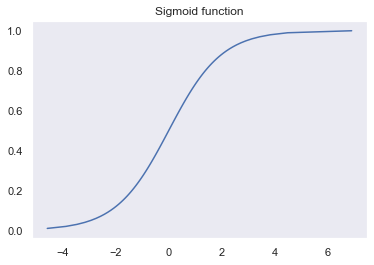

In [3]:
a_new = b
p_new = expit (a_new)
 
plt.plot(a_new,p_new)
plt.grid()
plt.title('Sigmoid function');

## Data Description

The variables in the dataset are:

Male: Gender (1 = Male, 0 = Female)

Age: Patient age

Education: Education level (1 = some high school, 2 =high school/GED, 3 = some college, 4 = college) 

CurrentSmoker: 1 = patient is smoker 

CigsPerDay: Number of cigarettes patient smokes per day 

BPMeds: 1 = patient is on blood pressure medication 

PrevalentStroke: 1 = patient has previously had a stroke 

PrevalentHyp: 1 = patient has hypertension 

Diabetes: 1 = patient has diabetes 

Chol: total cholesterol (mg/dL) 

SysBP: systolic blood pressure (mmHg) 

DiaBP: diastolic blood pressure (mmHg) 

BMI: body mass index (weight / $height^2$) 

HeartRate: Heart rate (beats per minute)

Glucose: blood glucose level (mg/dL) 

TenYearCHD: 1 = patient developed coronary heart disease within 10 years of exam

In [4]:
# Load the data
data = pd.read_csv('framingham.csv')
# Let's check what's inside this data frame
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
# Checking the data to have an insight of the features and target
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
# Checking the data for missing values with the function.
def missing_values_table(mv):
        # Total missing values
        mis_val = mv.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * mv.isnull().sum() / len(mv)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Dataframe has " + str(mv.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# Viewing the missing values table
missing_values_table(data)

Dataframe has 16 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
glucose,388,9.2
education,105,2.5
BPMeds,53,1.3
totChol,50,1.2
cigsPerDay,29,0.7
BMI,19,0.4
heartRate,1,0.0


In [8]:
# Viewing the distribution of columns.
with pd.option_context('display.max_rows', None):
    for col in data:
        print(col, len(data[col].value_counts()))

male 2
age 39
education 4
currentSmoker 2
cigsPerDay 33
BPMeds 2
prevalentStroke 2
prevalentHyp 2
diabetes 2
totChol 248
sysBP 234
diaBP 146
BMI 1363
heartRate 73
glucose 143
TenYearCHD 2


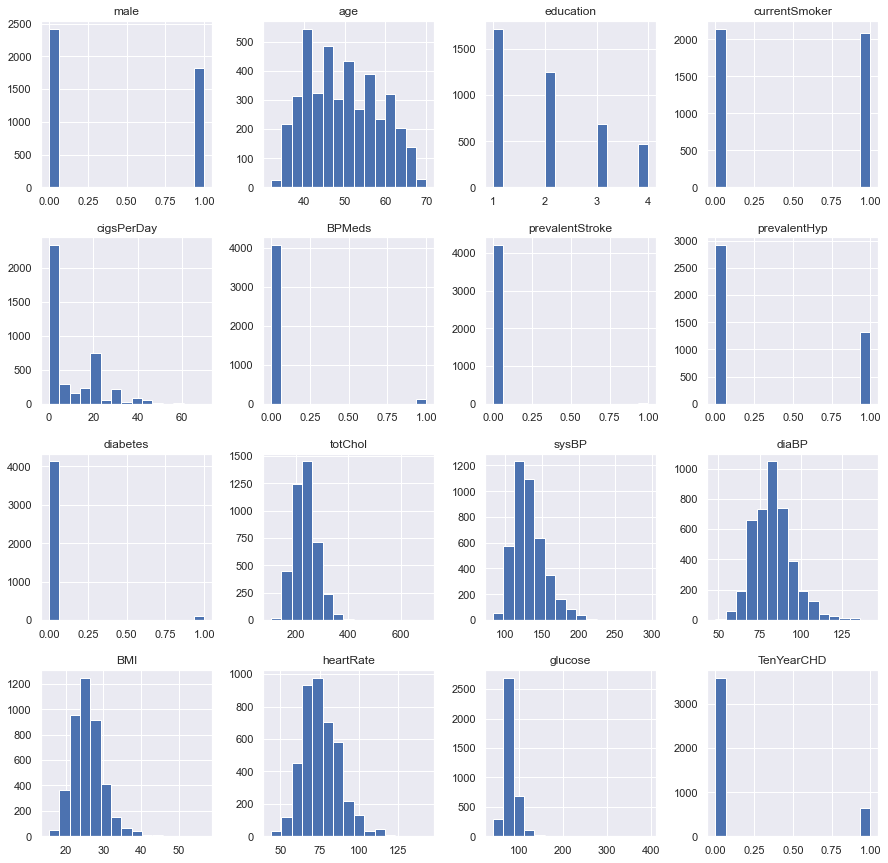

In [9]:
# Plotting the data distribution 
data.hist(bins=15, figsize=(15,15))
plt.show() 

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

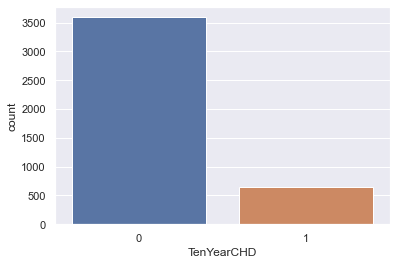

In [10]:
sns.countplot(x='TenYearCHD',data=data) # The target variable

In [11]:
# Checking the Corrleation matrix
corr = data.corr()
round(corr,2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.00,-0.03,0.02,0.20,0.32,-0.05,-0.00,0.01,0.02,-0.07,-0.04,0.06,0.08,-0.12,0.01,0.09
age,-0.03,1.00,-0.17,-0.21,-0.19,0.12,0.06,0.31,0.10,0.26,0.39,0.21,0.14,-0.01,0.12,0.23
education,0.02,-0.17,1.00,0.02,0.01,-0.01,-0.04,-0.08,-0.04,-0.02,-0.13,-0.06,-0.14,-0.05,-0.04,-0.05
currentSmoker,0.20,-0.21,0.02,1.00,0.77,-0.05,-0.03,-0.10,-0.04,-0.05,-0.13,-0.11,-0.17,0.06,-0.06,0.02
cigsPerDay,0.32,-0.19,0.01,0.77,1.00,-0.05,-0.03,-0.07,-0.04,-0.03,-0.09,-0.06,-0.09,0.08,-0.06,0.06
BPMeds,-0.05,0.12,-0.01,-0.05,-0.05,1.00,0.12,0.26,0.05,0.08,0.25,0.19,0.10,0.02,0.05,0.09
prevalentStroke,-0.00,0.06,-0.04,-0.03,-0.03,0.12,1.00,0.07,0.01,0.00,0.06,0.05,0.03,-0.02,0.02,0.06
prevalentHyp,0.01,0.31,-0.08,-0.10,-0.07,0.26,0.07,1.00,0.08,0.16,0.70,0.62,0.30,0.15,0.09,0.18
diabetes,0.02,0.10,-0.04,-0.04,-0.04,0.05,0.01,0.08,1.00,0.04,0.11,0.05,0.09,0.05,0.62,0.10
totChol,-0.07,0.26,-0.02,-0.05,-0.03,0.08,0.00,0.16,0.04,1.00,0.21,0.17,0.12,0.09,0.05,0.08


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0.5, 0, 'male'),
  Text(1.5, 0, 'age'),
  Text(2.5, 0, 'education'),
  Text(3.5, 0, 'currentSmoker'),
  Text(4.5, 0, 'cigsPerDay'),
  Text(5.5, 0, 'BPMeds'),
  Text(6.5, 0, 'prevalentStroke'),
  Text(7.5, 0, 'prevalentHyp'),
  Text(8.5, 0, 'diabetes'),
  Text(9.5, 0, 'totChol'),
  Text(10.5, 0, 'sysBP'),
  Text(11.5, 0, 'diaBP'),
  Text(12.5, 0, 'BMI'),
  Text(13.5, 0, 'heartRate'),
  Text(14.5, 0, 'glucose'),
  Text(15.5, 0, 'TenYearCHD')])

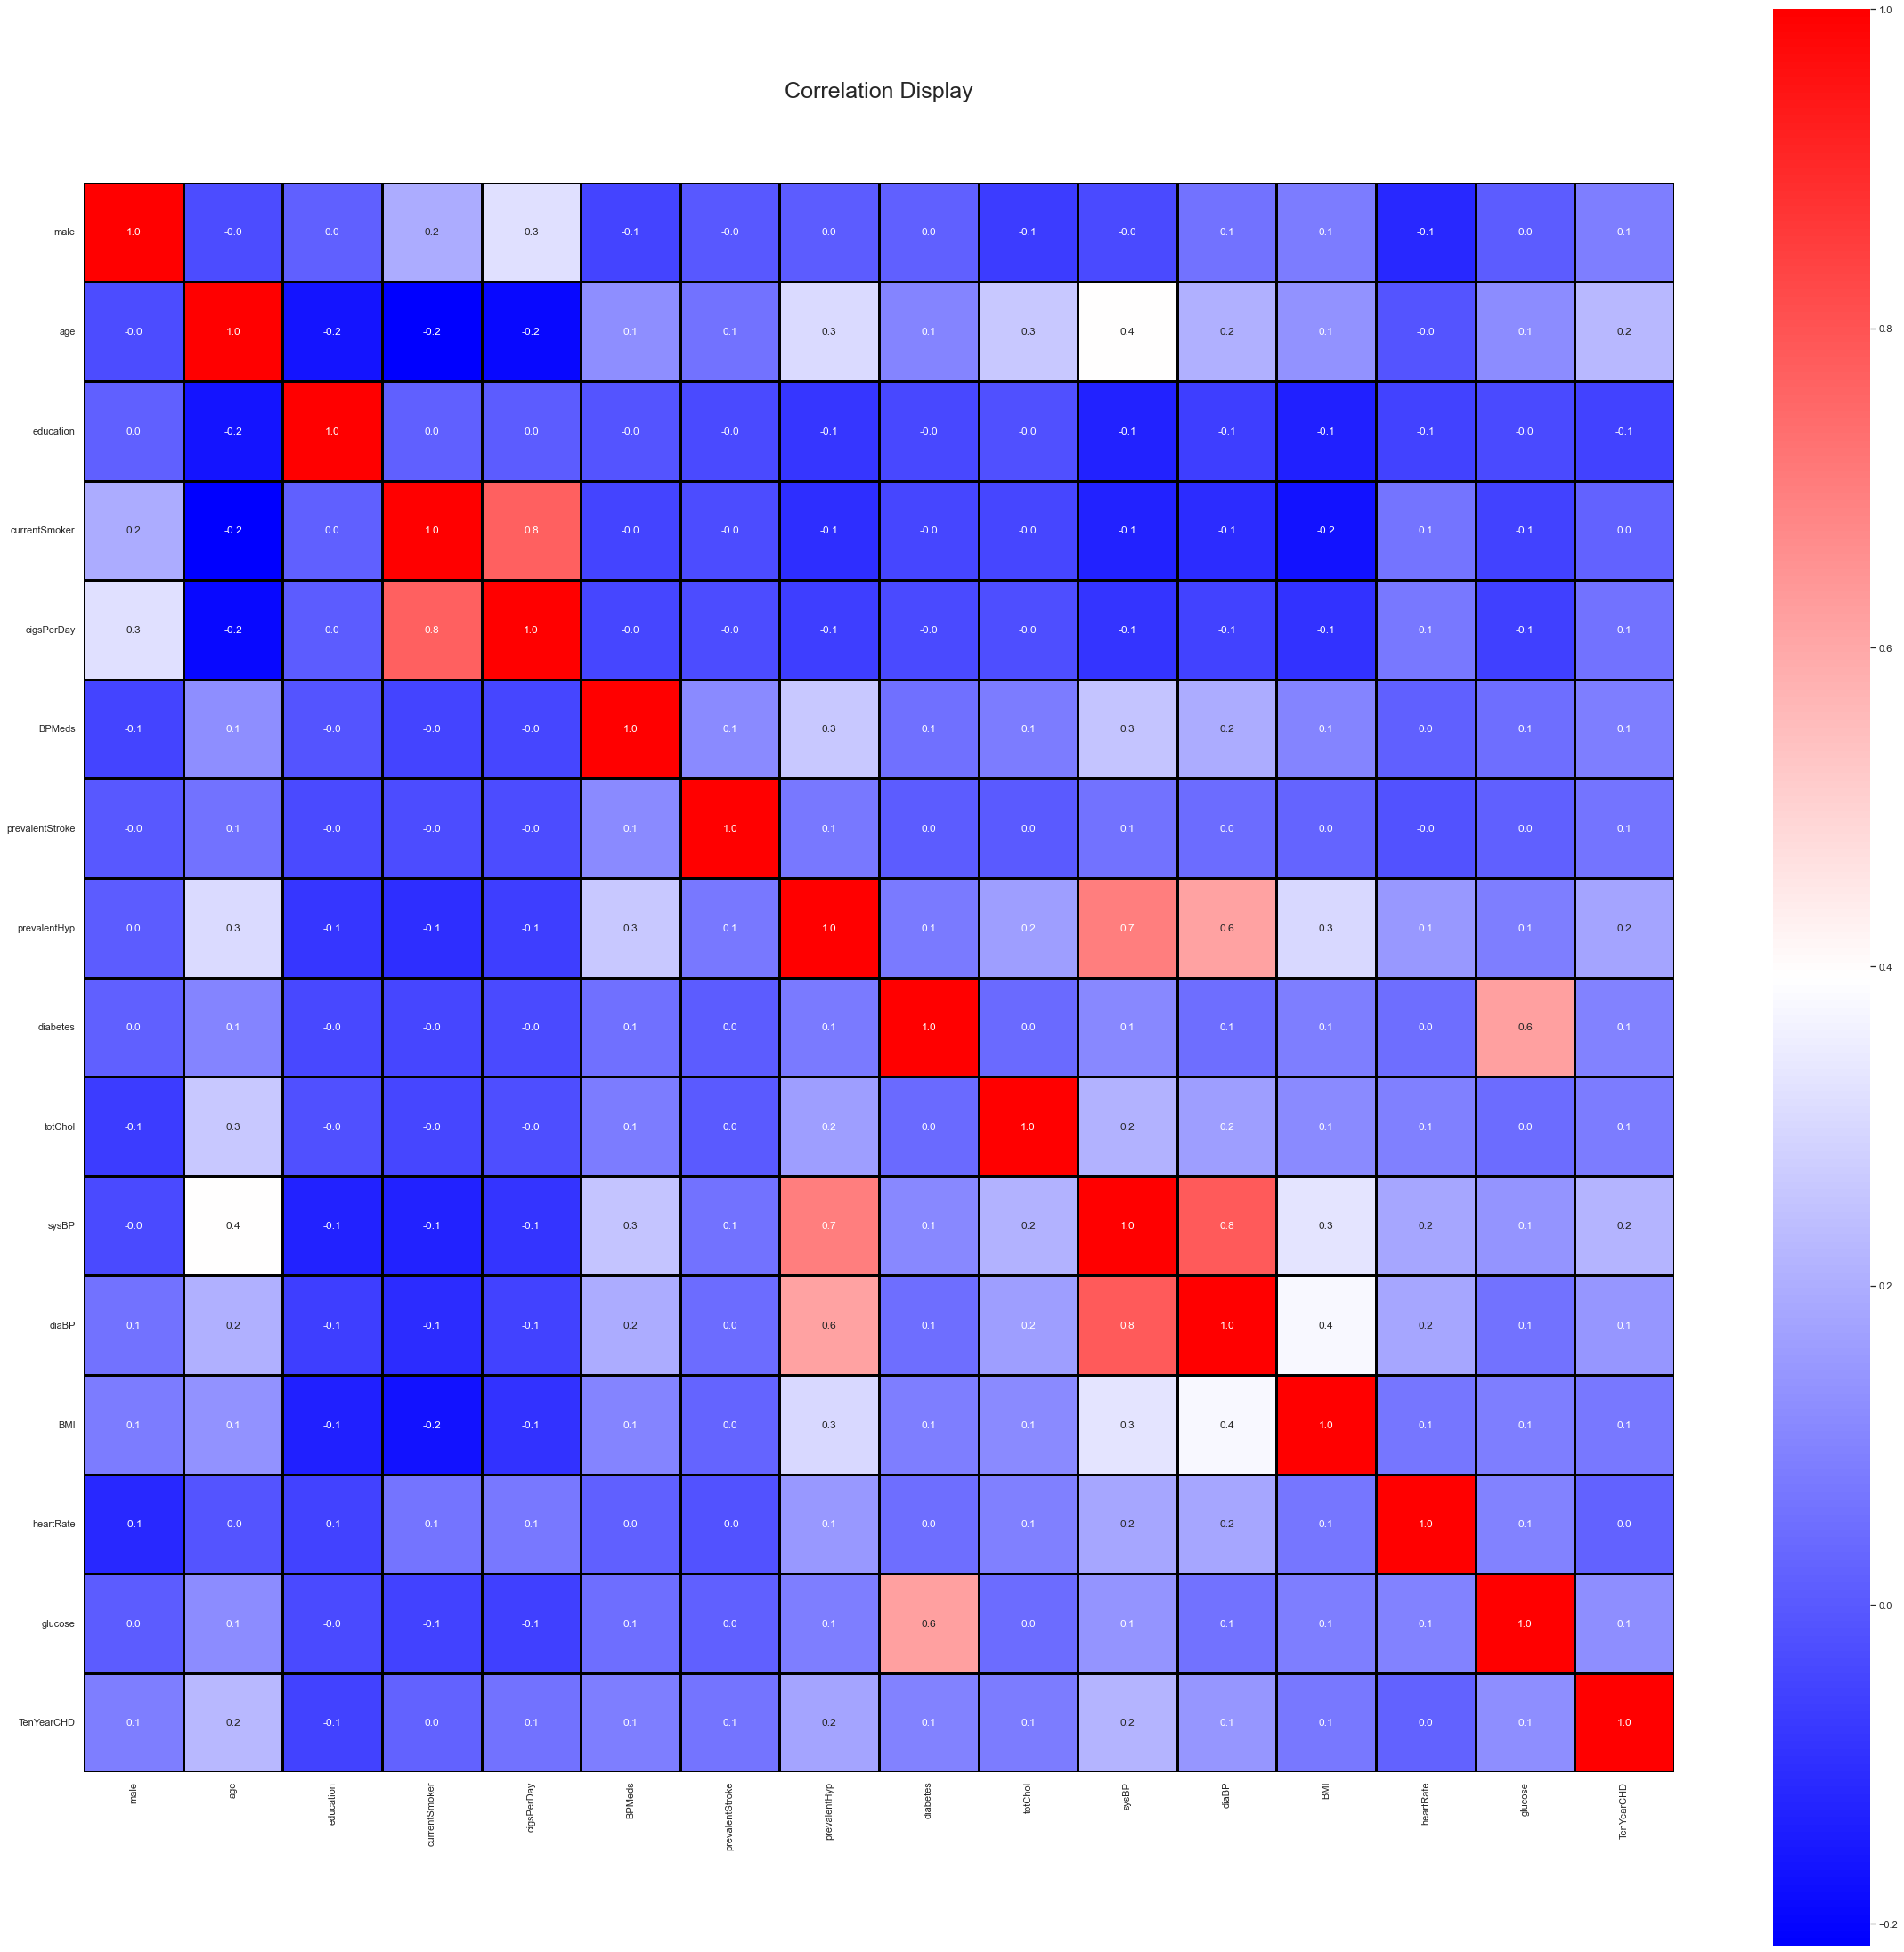

In [12]:
# Red = Maximum correlation
# Blue  = Minimum correlation

heatmap_correlation = data.corr()
colormap = plt.cm.inferno
plt.figure(figsize=(40,40))
plt.title('Correlation Display', y = 1.05, size = 25)
sns.heatmap(data=heatmap_correlation, square = True, annot=True, cmap = "bwr", fmt='.1f', linewidths=3, linecolor='black')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

In [13]:
# Choosing the features and target
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [14]:
X.shape

(4238, 15)

In [15]:
y.shape

(4238,)

In [16]:
# Dealing with missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X)
X = imputer.transform(X)

In [17]:
# checking again for any missing value
np.isnan(X)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [18]:
# Splitting Dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

In [19]:
# There is a need for scalling to improve the performance of the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Viewing the shape of the scaled data.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3390, 15) (848, 15) (3390,) (848,)


In [21]:
# Data training set
print('Train data: ',round(len(X_train)/len(X), 2))

# Data testing set
print('Test data: ', round(X_test.shape[0]/y.shape[0], 2))

Train data:  0.8
Test data:  0.2


In [22]:
# fitting the logistic model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=10, max_iter=750, random_state = 42)

In [23]:
%%time

log_reg.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 13 ms


LogisticRegression(C=10, max_iter=750, random_state=42)

In [24]:
%%time
y_pred = log_reg.predict(X_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [25]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[718   6]
 [115   9]]


**The result above shows that there are 718 correct predictions and 115 incorrect predictions.**

<AxesSubplot:>

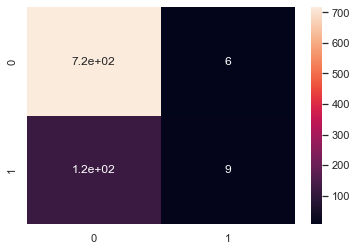

In [26]:
sns.heatmap(confusion_matrix, annot = True) 

In [27]:
# coefficient.
log_reg.coef_

array([[ 0.21459391,  0.57357472,  0.03272725, -0.01852287,  0.28454256,
         0.04249907,  0.07373766,  0.09067432,  0.0033868 ,  0.04025583,
         0.30973164,  0.01857747, -0.01920304, -0.06444429,  0.1841865 ]])

In [28]:
# intercept.
log_reg.intercept_

array([-1.97191922])

In [29]:
# Model Accuracy
print("Logistic Regression Accuracy is: {}%".format(round(metrics.accuracy_score(y_test, y_pred, 
                                                                        normalize=True,sample_weight=None)*100,2)))
print("Logistic Regression Mean Squared Error is: ", round(mean_squared_error(y_pred, y_test), 4))

Logistic Regression Accuracy is: 85.73%
Logistic Regression Mean Squared Error is:  0.1427


In [30]:
F1_Score          =  f1_score(y_test, y_pred, average='macro')
Precision_score   =  metrics.precision_score(y_test, y_pred, average='macro')
Recall_score      =  metrics.recall_score(y_test, y_pred, average='macro')

print('F1 score: %f' % F1_Score  )
print('Precision: %f' % Precision_score)
print('Recall: %f' % Recall_score)

F1 score: 0.525891
Precision: 0.730972
Recall: 0.532147
